
# Project: MNIST

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#ml">Classification Models</a></li>    
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.


> Goal is to correctly identify digits from a dataset of tens of thousands of handwritten images


In [1]:
from sklearn.datasets import fetch_openml

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
sb.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

In [4]:
import warnings
warnings.simplefilter("ignore")

In [23]:
#Loading dataset
mnist = fetch_openml("mnist_784", version=1,  as_frame= False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [24]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [25]:
mnist["data"].shape

(70000, 784)

In [12]:
mnist["target"]

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [26]:
X, y = mnist['data'], mnist['target']

In [27]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [29]:
#plotting the 1st digit
random_digit = X[0].reshape(28, 28)

5


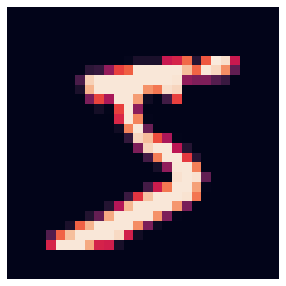

In [35]:
plt.imshow(random_digit, 
           interpolation='nearest'
          )
plt.axis('off');
print(y[0])

In [36]:
#cast y to integers instead of category
y = y.astype(np.uint8)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state= 42)

In [45]:
X_train.shape, y_train.shape

((49000, 784), (49000,))

In [56]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [51]:
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [400, 450, 500, 550, 600]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
400.0,0.031163
450.0,0.031408
500.0,0.031265
550.0,0.031143
600.0,0.031041


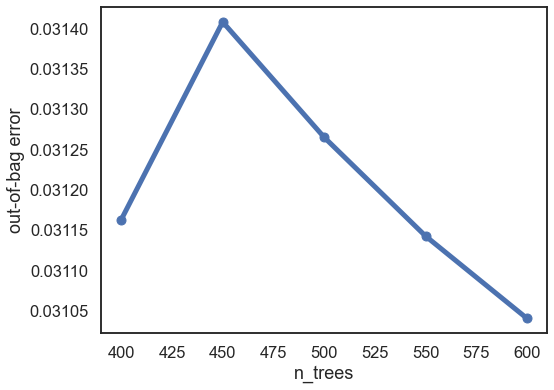

In [52]:
sb.set_context('talk')
sb.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(8, 6), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [61]:
model = RF.set_params(n_estimators=600)
y_pred = model.predict(X_test)

In [63]:
cr = classification_report(y_test, y_pred)
print(cr)


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2058
           1       0.98      0.99      0.98      2364
           2       0.95      0.97      0.96      2133
           3       0.96      0.95      0.96      2176
           4       0.97      0.97      0.97      1936
           5       0.97      0.96      0.97      1915
           6       0.98      0.98      0.98      2088
           7       0.97      0.97      0.97      2248
           8       0.96      0.95      0.96      1992
           9       0.95      0.95      0.95      2090

    accuracy                           0.97     21000
   macro avg       0.97      0.97      0.97     21000
weighted avg       0.97      0.97      0.97     21000



In [62]:
conf_mx = confusion_matrix(y_test, y_pred)
conf_mx

array([[2026,    0,    5,    0,    2,    3,    6,    2,   14,    0],
       [   0, 2331,   10,   10,    2,    2,    0,    6,    2,    1],
       [   4,    6, 2071,    7,    6,    1,   12,   13,   10,    3],
       [   4,    0,   32, 2067,    2,   17,    2,   21,   18,   13],
       [   2,    3,    4,    0, 1882,    0,    3,    5,    2,   35],
       [   6,    3,    2,   22,    4, 1845,   14,    2,   11,    6],
       [   5,    3,    1,    0,    7,   12, 2055,    0,    5,    0],
       [   2,    6,   29,    2,    9,    0,    0, 2170,    4,   26],
       [   3,   10,   12,   21,   12,   14,    7,    5, 1891,   17],
       [  12,    9,    7,   22,   18,    5,    2,   16,    9, 1990]],
      dtype=int64)

In [66]:
knn_clf = KNeighborsClassifier(weights='distance')
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [67]:
y_pred_k = knn_clf.predict(X_test)
cr = classification_report(y_test, y_pred_k)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2058
           1       0.95      0.99      0.97      2364
           2       0.98      0.95      0.97      2133
           3       0.97      0.96      0.97      2176
           4       0.97      0.97      0.97      1936
           5       0.97      0.97      0.97      1915
           6       0.98      0.99      0.98      2088
           7       0.96      0.97      0.97      2248
           8       0.99      0.93      0.96      1992
           9       0.95      0.96      0.96      2090

    accuracy                           0.97     21000
   macro avg       0.97      0.97      0.97     21000
weighted avg       0.97      0.97      0.97     21000



In [68]:
from sklearn.neural_network import MLPClassifier

In [69]:
clf = MLPClassifier(max_iter=300)
clf.fit(X_train, y_train)

MLPClassifier(max_iter=300)

In [70]:
y_pred_nn = clf.predict(X_test)
cr = classification_report(y_test, y_pred_nn)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2058
           1       0.98      0.98      0.98      2364
           2       0.97      0.95      0.96      2133
           3       0.94      0.96      0.95      2176
           4       0.93      0.98      0.96      1936
           5       0.96      0.96      0.96      1915
           6       0.98      0.97      0.98      2088
           7       0.96      0.97      0.97      2248
           8       0.94      0.94      0.94      1992
           9       0.97      0.92      0.94      2090

    accuracy                           0.96     21000
   macro avg       0.96      0.96      0.96     21000
weighted avg       0.96      0.96      0.96     21000

